<a href="https://colab.research.google.com/github/Swathi-devspace/python-debug-assistant/blob/main/EDA_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


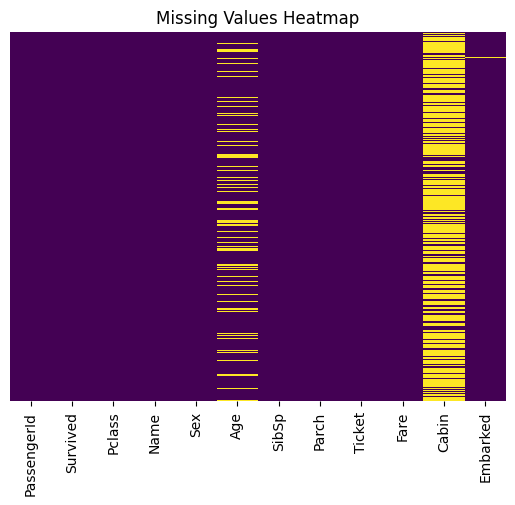

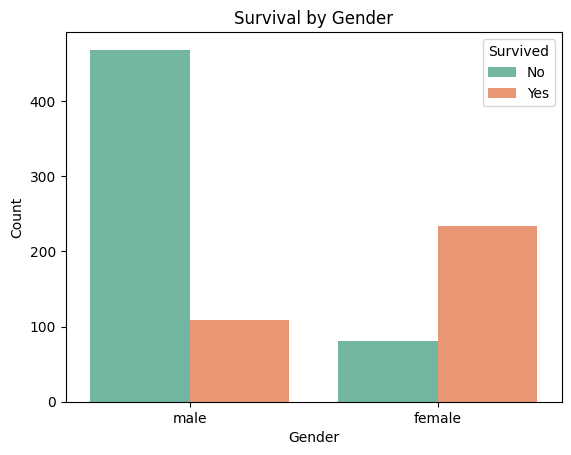

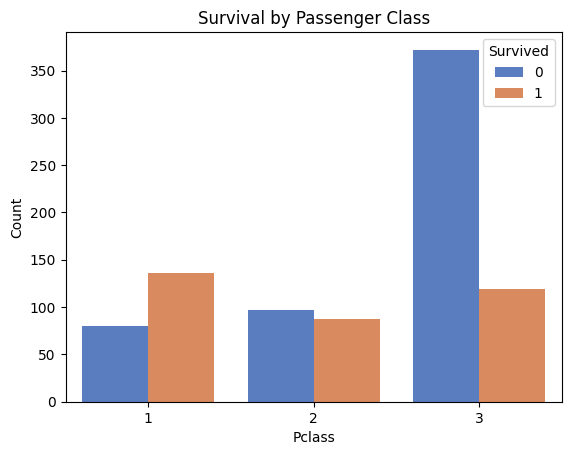

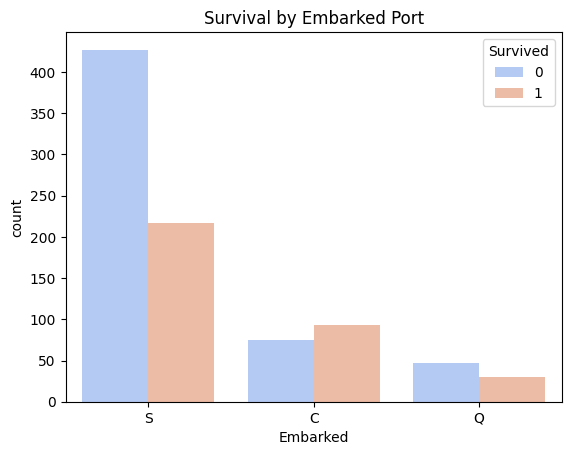

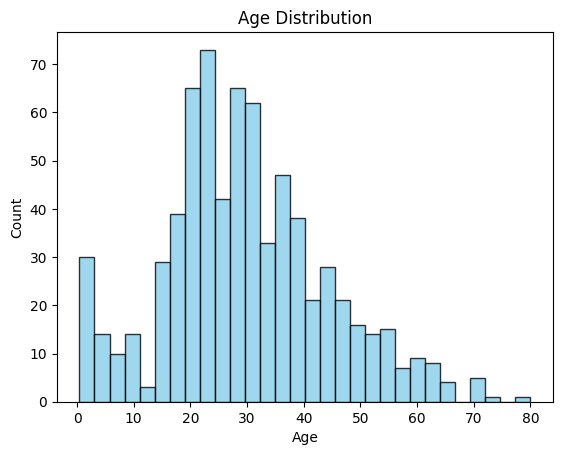

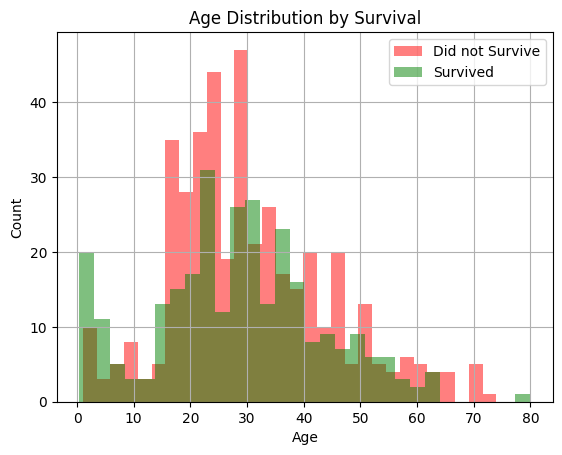

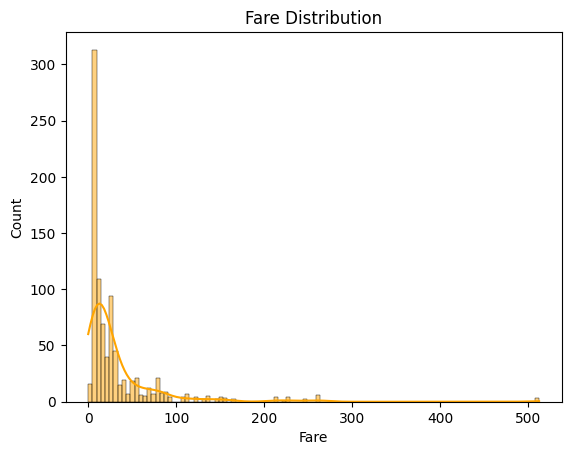

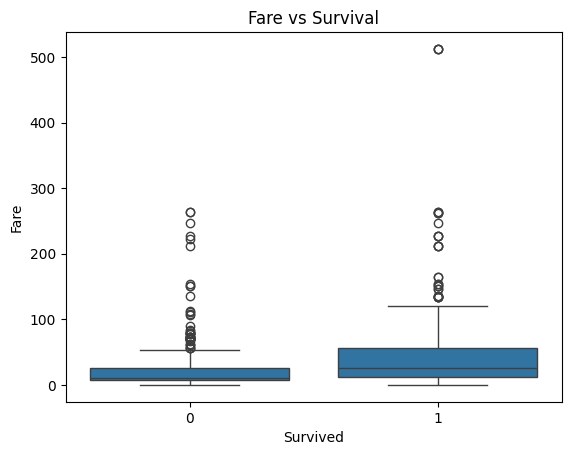

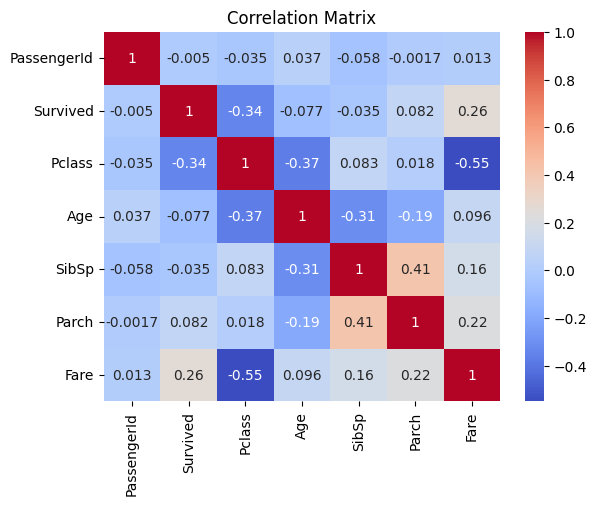

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pivot Table (Pclass & Sex):
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [8]:
# ##Exploratory data analysis on titanic data set
from google.colab import drive
drive.mount('/content/drive')
# 1.Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load dataset
file_path = '/content/drive/MyDrive/Titanic_dataset_EDA/train.csv'
df = pd.read_csv(file_path)

# 3.basic exploration
print("Shape of dataset:", df.shape)
df.head()
df.info()
df.describe()
list(df.columns)
# ##Insights
# -Dataset has ~891 rows and 12 columns.
# -Contains both categorical (Sex, Embarked, Pclass) and numerical (Age, Fare) features.
# -Missing values exist in Age, Cabin, and Embarked.

# 4.missing values
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
# ##Observation:-
# -Age has ~20% missing values.
# -Cabin is missing heavily (>75%).
# -Embarked has 2 missing entries.

# 5. Categorical Analysis
df['Sex'].value_counts()
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
# ##Insight: Females had a much higher survival rate than males.
#6.pclass distribution
df['Pclass'].value_counts()
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()
# ##Insight: Passengers in 1st class had the highest survival rate, while 3rd class had the lowest.
# 7.embarked distribution
df['Embarked'].value_counts(dropna=False)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival by Embarked Port")
plt.show()
#Insight: Passengers embarking from C (Cherbourg) had a higher survival probability compared to S (Southampton).

# 8.Numerical Analysis
#Age distribution
df['Age'].dropna().hist(bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(False)
plt.show()
df[df['Survived']==0]['Age'].hist(bins=30, alpha=0.5, label='Did not Survive', color='red')
df[df['Survived']==1]['Age'].hist(bins=30, alpha=0.5, label='Survived', color='green')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.show()
# ##Insight: Children had a slightly higher survival rate compared to older passengers.

#fare distribution
sns.histplot(df['Fare'], kde=True, color='orange')
plt.title("Fare Distribution")
plt.show()
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()
#Insight: Higher fare passengers (1st class) had better survival chances.
# 9.Correlation Analysis
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# ##Insight:
#Fare and Pclass are strongly correlated with Survived.
#SibSp and Parch have weak correlation.

# 10. Grouped survival rates
print("Survival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nPivot Table (Pclass & Sex):")
print(df.pivot_table(index='Pclass', columns='Sex', values='Survived'))
# ##Insight:
#Females in 1st class had the highest survival rate.
#Males in 3rd class had the lowest survival rate.